a) Solve the nonlinear system (14.10) to find the unknown $x_{n+1}$, $y_{n+1}$ as a function of $x_{n}$, $x_{n}$, Δt, α, β, γ, and δ. [Hint: First, express $x_{n+1}$ and $y_{n+1}$ as functions of the other terms, i.e., $x_{n+1}$ = $x_{n} (1 − Δt(α − βy_{n+1} ))^{−1}$ and $y_{n+1}$ = $y_{n} (1 − Δt(\delta x_{n+1} − \gamma ))^{−1}$
Then, substitute the expression for $x_{n+1}$ into that for $y_{n+1}$, and vice versa. With some further algebraic steps, you will obtain
$$(1-\alpha\Delta t)\delta\Delta t x_{n+1}^{2}-[(1-\alpha\Delta t)\cdot(1+\gamma\Delta t)+\delta\Delta t\,x_{n}+\beta\,\Delta t y_{n}]x_{n+1}+(1+\gamma\Delta t)x_{n}=0$$
and
$$(1+\gamma\Delta t)\beta\Delta t y_{n+1}^{2}+[(1-\alpha\Delta t)\cdot(1+\gamma\Delta t)-\beta\Delta t y_{n}-\delta\Delta t x_{n}]y_{n+1}-(1-\alpha\Delta t)y_{n}=0 $$
which are two second-degree algebraic equations for $x_{n+1}$ and $y_{n+1}$. Solve them in
the standard way and choose the solution that is closest to ($x_n , y_n$ ).]

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def MitternachtsformelX(x0,y0,alpha,beta,gamma,delta,deltaT):
    a = (1-alpha*deltaT)*delta*deltaT 
    b = -((1-alpha*deltaT)*(1+gamma*deltaT)+delta*deltaT*x0+beta*deltaT*y0)
    c = (1+gamma*deltaT)*x0
    
    "Solve a quadratic equation using the Mitternachtsformel."
    
    # Compute the two solutions
    x1 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
    x2 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
    # Return the solution that is closest to the initial value
    if abs(x1-x0) < abs(x2-x0):
        return x1
    else:
        return x2

In [10]:
def MitternachtsformelY(x0,y0,alpha,beta,gamma,delta,deltaT):
    a = (1+gamma*deltaT)*beta*deltaT
    b = (1+gamma*deltaT)*(1-alpha*deltaT)-delta*deltaT*x0-beta*deltaT*y0
    c = -(1-alpha*deltaT)*y0
    
    "Solve a quadratic equation using the Mitternachtsformel."
    
    # Compute the two solutions
    y1 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
    y2 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
    # Return the solution that is closest to the initial value
    if abs(y1-y0) < abs(y2-y0):
        return y1
    else:
        return y2

b) Using the formulas obtained in part (a), implement a function that calculates (${\tilde{x}}_{n+1},\;{\tilde{y}}_{n+1}$) given ($x_n$ , $y_n$ ) and use it to solve the Lotka–Volterra model using the implicit Euler integration scheme (equations (14.10)), i.e., use the estimate $\tilde{x}_{n+1}$,$\tilde{y}_{n+1}$ to calculate
$$x_{n+1}\;=\;x_{n}+(\alpha\tilde{x}_{n+1}-\beta\tilde{x}_{n+1}\tilde{y}_{n+1})\Delta t$$
$$y_{n+1}\;=\;y_{n}+\left(\delta\widetilde{x}_{n+1}\widetilde{y}_{n+1}-\gamma\widetilde{y}_{n+1}\right)\Delta t$$

In [11]:
deltaT = 0.05
alpha = 2/3
beta = 4/3
gamma = 1
delta = 1
x0 = 1
y0 = 1
tMax = 20
x = []
y = []

for i in range(int(tMax/deltaT)):
    factorX =  MitternachtsformelX(x0,y0,alpha,beta,gamma,delta,deltaT)
    factorY =  MitternachtsformelY(x0,y0,alpha,beta,gamma,delta,deltaT)

    x1 = x0 + deltaT * (alpha * factorX - beta * factorX * factorY)
    y1 = y0 + deltaT * (delta * factorX * factorY  - gamma * factorY)
    
    x0 = x1
    y0 = y1
    x.append(x0)
    y.append(y0)

c) Plot the numerical solution found. Compare it with figure 14.5(a).

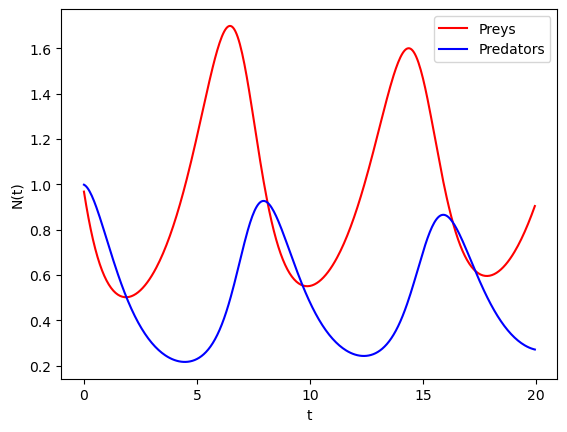

In [12]:
#Plotting
t = np.arange(0, tMax, deltaT)

plt.plot(t,x,'r',label='Preys')
plt.plot(t,y,'b',label='Predators')
plt.xticks(np.arange(0, tMax+1, 5))
plt.ylabel('N(t)')
plt.xlabel('t')
plt.legend()
plt.show()

c) Calculate the value of the invariant I(x, y). Is it constant in time? Compare it with figure 14.5(b).

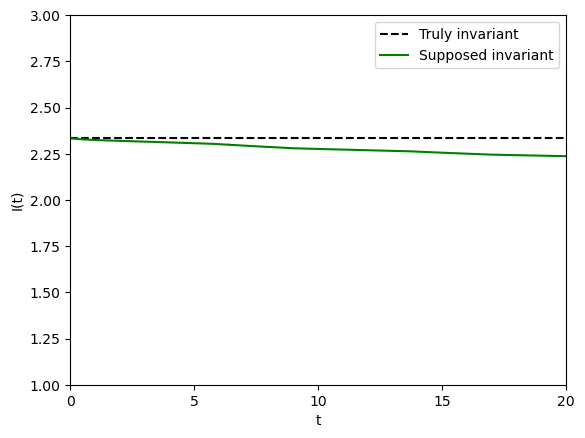

In [13]:
invariant = delta * np.array(x) - gamma * np.log(np.array(x)) + beta * np.array(y) - alpha * np.log(np.array(y))
plt.axhline(y=invariant[0], color='black', linestyle='dashed', label='Truly invariant')

plt.plot(t, invariant, 'g', label='Supposed invariant')
plt.xticks(np.arange(0, tMax+1, 5))
plt.ylabel('I(t)')
plt.ylim(1.0, 3.0)
plt.xlim(0, 20)
plt.xlabel('t')
plt.legend()
plt.show()

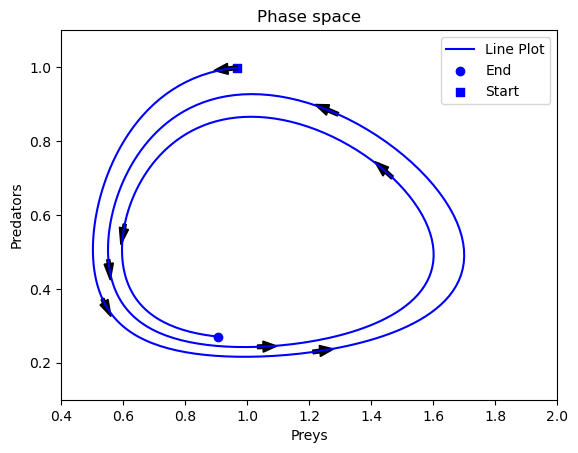

In [15]:
fig, ax = plt.subplots()

ax.plot(x, y, label='Line Plot', color='blue')
ax.scatter(x[-1], y[-1], marker='o', color='blue', label='End')
ax.scatter(x[0], y[0], marker='s', color='blue', label='Start')
ax.set_xlim([0.4, 2.0])
ax.set_ylim([0.1, 1.1])
ax.set_xlabel('Preys')
ax.set_ylabel('Predators')
ax.set_title('Phase space')
ax.legend()

# show the direction of the flow with some arrows on the trajectory
for i in range(0, int(tMax/deltaT), 50):
    ax.arrow(x[i], y[i], x[i+1]-x[i], y[i+1]-y[i], width=0.01, color='black')

plt.show()